<h1>Exploration of a Forest Fire Simulation</h1>
<h2>Final Project</h2>
<h2>PHY 2200 - Spring 2023</h2>

### Introduction and overview

Consider the model of a forest from `unit3b`. Each cell on a two-dimensional plane can be in one of three states: empty (0), tree (1), or on fire (2). As a reminder, a cell in our initial plane will begin as a tree with a 25% probability, and each iteration of this system abides by the following rules:

- A tree grows on an empty cell with probability $p$
- A tree starts burning with probability $f$
- A tree will burn if one of its four nearest neighbors is on fire
- A burning cell turns into an empty cell.

This time, we will be introducing water as a possible state. The new possible states will be: empty (0), tree (1), water (2), and on fire (3). During initial construction, each cell will instead start as a tree with a probability of 25%, a water cell with a probability of 5%, or stay empty (leaving 70%). We will also add two new rules:

- A tree will not catch fire if a water cell is a neighbor
- Water cells are permanent.

### Calculation

In [14]:
import numpy as np
from matplotlib import pyplot as plt

from time import sleep # To set the animation frame rate 
from IPython.display import clear_output # To redraw

from matplotlib.colors import ListedColormap

We will first need a function to create the forest plane. Because cell has a 25% chance of becoming a tree, we can use `np.random.rand()` to give us a random value between 0 and 1, which means the probability will be less than 0.25 25% of the time. This will be our probability. If this number is less than 0.25, then that cell will be a tree. The same thing applies to the water cells, except our probability must be less than 0.05. 

In [35]:
def initialize(N):
    x = np.zeros((N,N))
    for i in range(0,N):
        for j in range(0,N):
            p = np.random.rand()
            if(p < .25):
                x[i,j] = 1
                if(p < .05):
                    x[i,j] = 2

    return x

Now that our initial state is set up, we have to iterate through it `N` times and apply the rules. This function goes through the plane each cell at a time. It first generates our random number for the probabilities. Next, it checks if the boundaries are on fire, and corrects them if necessary (checking neighbors is out of array range, so it would be wrong if this was left out). Then, if the current cell is empty, it will grow $p$% of the time. If the current cell is on fire, it will check if a neighbor is a water cell. If so, the current cell goes back to a tree. If not, the current cell becomes empty and spreads to neighbors <i>if they are trees</i>. Finally, if the cell is a tree, it has a neighbor on fire and does not have a water neighbor, it too will become a tree on fire. The fire probability $f$ is also applied here, so long as there are no water neighbors.

In [69]:
def forestupdate(x,p,f):
    N = len(x)
    xnew = x
    
    for i in range(0,N):
        for j in range(0,N):
            prob = np.random.rand()
            
            # RESET BOUNDS ON FIRE
            if(i >= N-1 or j >= N-1):
                if(xnew[i,j] == 3):
                    xnew[i,j] = 0
            
            # EMPTY CELL
            if(xnew[i,j] == 0):
                if(prob < p):
                    xnew[i,j] = 1
            
            # ON FIRE
            if(xnew[i,j] == 3):
                if(i != N-1 and j != N-1):
                    # is neighbor water?
                    if(xnew[i+1,j]==2 or xnew[i-1,j]==2 or xnew[i,j-1]==2 or xnew[i,j+1]==2):
                        # go back to tree
                        xnew[i,j] = 1
                    else:
                        # go to empty
                        xnew[i,j] = 0
                        
                        # if neighbor is tree, burn
                        if(xnew[i+1,j]==1):
                            xnew[i+1,j] = 3
                        if(xnew[i-1,j]==1):
                            xnew[i-1,j] = 3
                        if(xnew[i,j+1]==1):
                            xnew[i,j+1] = 3
                        if(xnew[i,j-1]==1):
                            xnew[i,j-1] = 3

            
            # CELL IS TREE
            if(xnew[i,j] == 1):
                if(i != N-1 and j != N-1):
                    # if fire in neighbor
                    if(xnew[i+1,j] == 3 or xnew[i-1,j] == 3 or xnew[i,j-1] == 3 or xnew[i,j+1] == 3):
                        # AND WATER IS NOT A NEIGHBOR
                        if(xnew[i+1,j] != 2 and xnew[i-1,j] != 2 and xnew[i,j-1] != 2 and xnew[i,j+1] != 2):
                            xnew[i,j] = 3
                        
                    # fire prob
                    if(prob < f and xnew[i+1,j]!=2 and xnew[i-1,j]!=2 and xnew[i,j-1]!=2 and xnew[i,j+1]!=2):
                        xnew[i,j] = 3

    return xnew

Now that we have our iteration function complete, we can give it a test drive. We will be using a sample size of 40, and a tree-growth and fire probability of $$\frac{30}{N^2}$$ and $$\frac{0.1}{N^2}$$ respectively. Then we can plot our results and see the changes after each iteration.

In [70]:
N = 40
p = 30/(N**2)
f = 0.1/(N**2)

Nt = 100
x = np.zeros((N,N,Nt))

x[:,:,0] = initialize(N)
            
for n in range(0,Nt-1):
    x[:,:,n+1] = forestupdate(x[:,:,n],p,f)

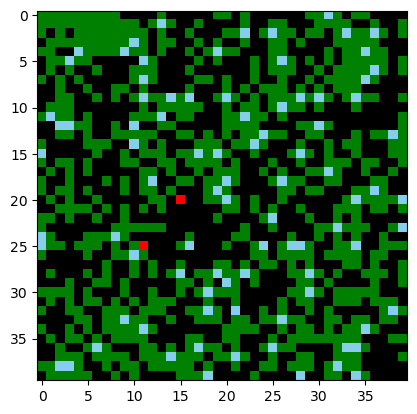

In [72]:
for n in range(0,Nt):
    sleep(0.01) # Sets the maximum animation speed
    plt.imshow(x[:,:,n],cmap=ListedColormap(["black","green","skyblue","red"]),vmin=0, vmax=3)
    clear_output(wait=True)
    plt.show()

This is all well and good, but what happens if we increase the sample size to `N = 100`? We will also be increasing the tree-growth and fire chance so that it is equivalent to the previous sample.

In [80]:
N = 100
p = 75/(N**2)
f = .25/(N**2)

Nt = 250
x = np.zeros((N,N,Nt))

x[:,:,0] = initialize(N)
            
for n in range(0,Nt-1):
    x[:,:,n+1] = forestupdate(x[:,:,n],p,f)

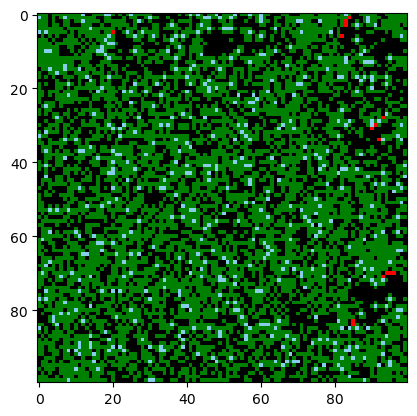

In [81]:
for n in range(0,Nt):
    sleep(0.01) # Sets the maximum animation speed
    plt.imshow(x[:,:,n],cmap=ListedColormap(["black","green","skyblue","red"]),vmin=0, vmax=3)
    clear_output(wait=True)
    plt.show()

At this sample size, it is hard to see how many cells are in what state. To help with this, We will create a function to tally each state of the cells.

In [82]:
def counts(x):
    empty = 0
    trees = 0
    fire = 0
    water = 0
    for i in range(0,len(x)):
        for j in range(0,len(x)):
            if(x[i,j] == 0):
                empty += 1
            elif(x[i,j] == 1):
                trees += 1
            elif(x[i,j] == 2):
                water += 1
            else:
                fire += 1

    return empty, trees, water, fire

Now, we can fill in empty arrays with the size of each state at each timestep and graph it.

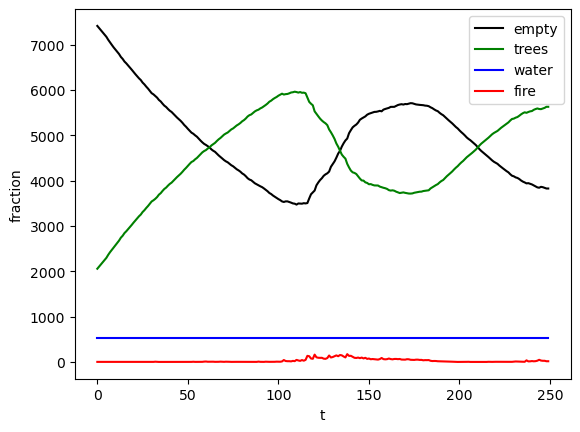

In [83]:
empty = np.zeros(Nt)
trees = np.zeros(Nt)
water = np.zeros(Nt)
fire = np.zeros(Nt)

for i in range(0,Nt):
    empty[i], trees[i], water[i], fire[i] = counts(x[:,:,i])
    
t = np.linspace(0,Nt-1,Nt)

plt.plot(t,empty,'k-')
plt.plot(t,trees,'g-')
plt.plot(t,water,'b-')
plt.plot(t,fire,'r-')

plt.legend(['empty','trees','water','fire'])
plt.xlabel('t')
plt.ylabel('fraction')

plt.show()

Remember that the amount of water cells is fixed, so the blue line should not be moving at all. The red line shifts every now and then, but certainly not as drastic as the ratio of empty-tree cells, as shown above. You can see the relationship between the fire, tree, and empty cells too. The number of fire cells begins to climb as the tree cells begin to decline and the empty cells begin to increase, before leveling off and correcting itself.